In [5]:
import torch
from torch import nn
from d2l import torch as d2l
from matplotlib import pyplot as plt

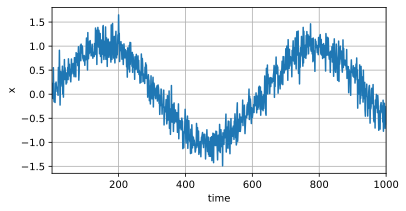

In [16]:
class Data(d2l.DataModule):
    def __init__(self, batch_size=16, T=1000, num_train=600, tau=4):
        self.save_hyperparameters()
        self.time = torch.arange(1, T+1, dtype=torch.float32)
        # sin curve + noise
        self.x = torch.sin(0.01 * self.time) + torch.randn(T) * 0.2

    def get_dataloader(self, train):
        features = [self.x[i : self.T-self.tau+i] for i in range(self.tau)]
        self.features = torch.stack(features, 1)
        self.labels = self.x[self.tau:].reshape((-1, 1))
        i = slice(0, self.num_train) if train else slice(self.num_train, None)
        return self.get_tensorloader([self.features, self.labels], train, i)

data = Data()
d2l.plot(data.time, data.x, 'time', 'x', xlim=[1, 1000], figsize=(6, 3))

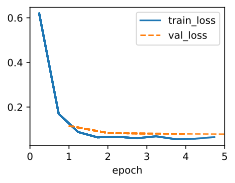

In [17]:
model = d2l.LinearRegression(lr=0.01)
trainer = d2l.Trainer(max_epochs=5)
trainer.fit(model, data)

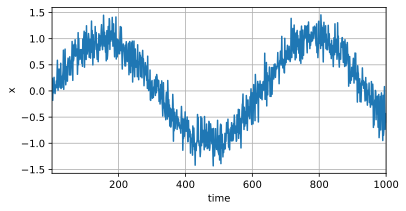

In [9]:
# recreating everything without the d2l library

class Data2:
    def __init__(self, batch_size=16, T=1000, num_train=600, tau=4):
        self.batch_size = batch_size
        self.T = T
        self.num_train = num_train
        self.tau = tau
        self.time = torch.arange(1, T+1, dtype=torch.float32)
        # sin curve + noise
        self.x = torch.sin(0.01 * self.time) + torch.randn(T) * 0.2

    def 

data2 = Data2()

plt.plot(data2.time, data2.x)
plt.xlabel('time')
plt.ylabel('x')
plt.xlim(1, 1000)
plt.grid()